In [147]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitness-analysis/fitness analysis.csv


In [148]:
url = '/kaggle/input/fitness-analysis/fitness analysis.csv'
data = pd.read_csv(url )
data.head()

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,2019/07/04 5:43:35 AM GMT+5:30,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,2019/07/04 5:44:29 AM GMT+5:30,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


In [149]:
# Standardizing column names by removing extra spaces and replacing them with underscores
data.columns = data.columns.str.strip().str.replace(" ", "_").str.replace(r"[^\w\s]", "", regex=True)

In [150]:
# Removing trailing spaces from string entries
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [151]:
# Renaming columns for clarity
data.rename(columns={
    "How_important_is_exercise_to_you_": "Exercise_Importance",
    "How_do_you_describe_your_current_level_of_fitness_": "Fitness_Level",
    "How_often_do_you_exercise": "Exercise_Frequency",
    "What_prevents_you_from_eating_a_healthy_balanced_diet_If_any_________________________Please_select_all_that_apply": "Dietary_Barriers",
    "How_healthy_do_you_consider_yourself": "Health_Self_Assessment",
    "Your_name": "Name",
    "Your_age": "Age",
    "What_barriers_if_any_prevent_you_from_exercising_more_regularly___________Please_select_all_that_apply": "Barriers",
    "What_forms_of_exercise_do_you_currently_participate_in_________________________Please_select_all_that_apply": "Current_Routine",
    "Do_you_exercise_____________": "Active_Status",
    "What_time_if_the_day_do_you_prefer_to_exercise": "Time",
    "How_long_do_you_spend_exercising_per_day_": "Duration",
    "Would_you_say_you_eat_a_healthy_balanced_diet_": "Balanced_Diet",
    "Do_you_exercise_____________": "Active_Status",
    "Your_gender": "Gender",
    "Have_you_ever_recommended_your_friends_to_follow_a_fitness_routine": "Recommended_Others",
    "Have_you_ever_purchased_a_fitness_equipment": "Personal_Equipment",
    "What_motivates_you_to_exercise_________Please_select_all_that_applies_": "Motivation",
    
}, inplace=True)

In [152]:
data.head()

,Timestamp,Name,Gender,Age,Exercise_Importance,Fitness_Level,Exercise_Frequency,Barriers,Current_Routine,Active_Status,Time,Duration,Balanced_Diet,Dietary_Barriers,Health_Self_Assessment,Recommended_Others,Personal_Equipment,Motivation
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,2019/07/04 5:43:35 AM GMT+5:30,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,2019/07/04 5:44:29 AM GMT+5:30,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


In [153]:
# Checking for missing or null values in the dataset
missing_values_report = data.isnull().sum()

# Displaying the missing values report
missing_values_report

Timestamp                 0
Name                      0
Gender                    0
Age                       0
Exercise_Importance       0
Fitness_Level             0
Exercise_Frequency        0
Barriers                  0
Current_Routine           0
Active_Status             0
Time                      0
Duration                  0
Balanced_Diet             0
Dietary_Barriers          0
Health_Self_Assessment    0
Recommended_Others        0
Personal_Equipment        0
Motivation                0
dtype: int64

In [154]:
# Viewing the data types of all columns in the dataset
data_types = data.dtypes

# Displaying data types for review
data_types


Timestamp                 object
Name                      object
Gender                    object
Age                       object
Exercise_Importance        int64
Fitness_Level             object
Exercise_Frequency        object
Barriers                  object
Current_Routine           object
Active_Status             object
Time                      object
Duration                  object
Balanced_Diet             object
Dietary_Barriers          object
Health_Self_Assessment     int64
Recommended_Others        object
Personal_Equipment        object
Motivation                object
dtype: object

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Timestamp               545 non-null    object
 1   Name                    545 non-null    object
 2   Gender                  545 non-null    object
 3   Age                     545 non-null    object
 4   Exercise_Importance     545 non-null    int64 
 5   Fitness_Level           545 non-null    object
 6   Exercise_Frequency      545 non-null    object
 7   Barriers                545 non-null    object
 8   Current_Routine         545 non-null    object
 9   Active_Status           545 non-null    object
 10  Time                    545 non-null    object
 11  Duration                545 non-null    object
 12  Balanced_Diet           545 non-null    object
 13  Dietary_Barriers        545 non-null    object
 14  Health_Self_Assessment  545 non-null    int64 
 15  Recomm

In [156]:
data.duplicated().sum()

0

In [157]:
data.head()

,Timestamp,Name,Gender,Age,Exercise_Importance,Fitness_Level,Exercise_Frequency,Barriers,Current_Routine,Active_Status,Time,Duration,Balanced_Diet,Dietary_Barriers,Health_Self_Assessment,Recommended_Others,Personal_Equipment,Motivation
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,2019/07/04 5:43:35 AM GMT+5:30,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,2019/07/04 5:44:29 AM GMT+5:30,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


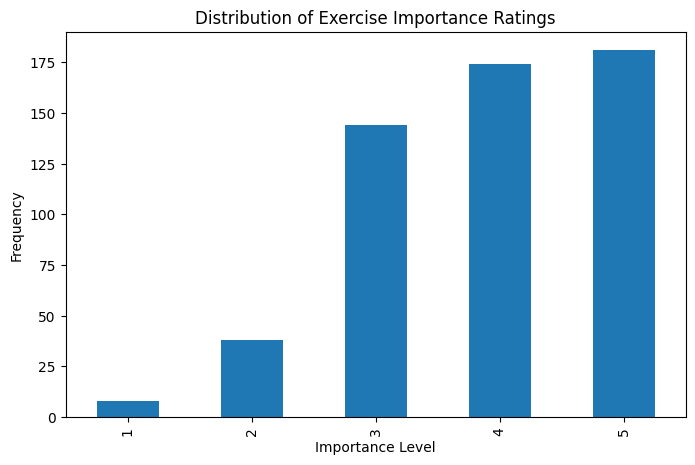

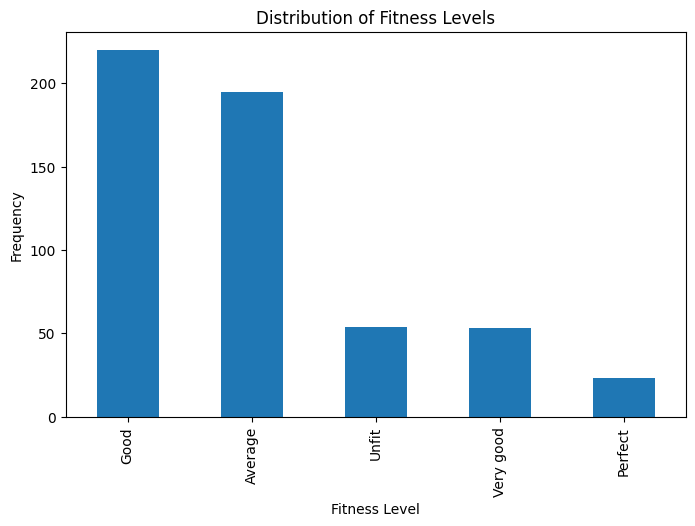

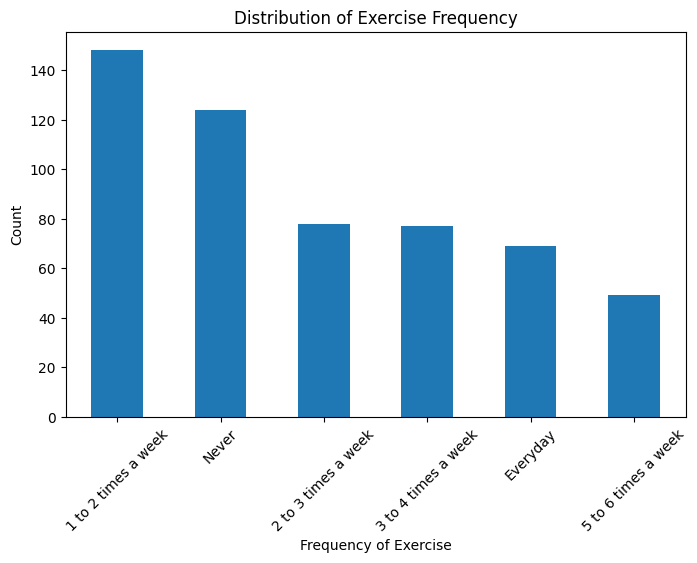

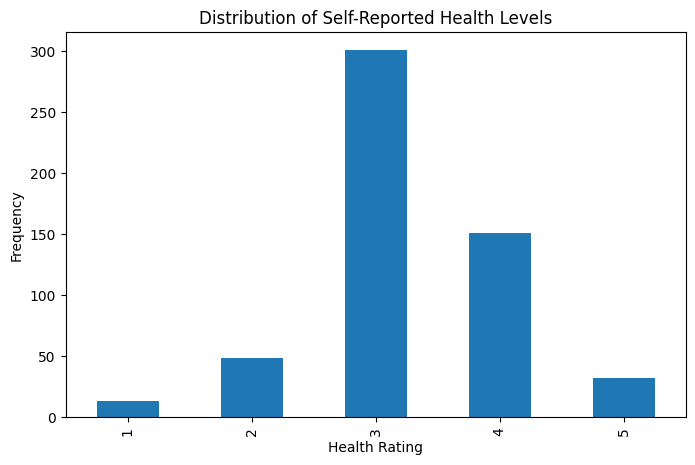

In [158]:
# Visualizing trends in key categorical and numerical responses

#Exercise Importance Ratings: The distribution of how respondents rate the importance of exercise.
#Fitness Levels: A bar chart showing the self-reported fitness levels.
#Exercise Frequency: Insights into how often participants exercise.
#Health Self-Assessments: Distribution of self-rated healthiness.

# Exercise Importance Distribution
plt.figure(figsize=(8, 5))
data['Exercise_Importance'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Exercise Importance Ratings')
plt.xlabel('Importance Level')
plt.ylabel('Frequency')
plt.show()

# Fitness Level Distribution
plt.figure(figsize=(8, 5))
data['Fitness_Level'].value_counts().plot(kind='bar')
plt.title('Distribution of Fitness Levels')
plt.xlabel('Fitness Level')
plt.ylabel('Frequency')
plt.show()

# Exercise Frequency Distribution
plt.figure(figsize=(8, 5))
data['Exercise_Frequency'].value_counts().plot(kind='bar')
plt.title('Distribution of Exercise Frequency')
plt.xlabel('Frequency of Exercise')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Health Self-Assessment Distribution
plt.figure(figsize=(8, 5))
data['Health_Self_Assessment'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Self-Reported Health Levels')
plt.xlabel('Health Rating')
plt.ylabel('Frequency')
plt.show()

In [159]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

In [160]:
# 1. Data Preprocessing

# Categorical and numerical columns
categorical_cols = ['Fitness_Level', 'Exercise_Frequency', 'Balanced_Diet']
numerical_cols = ['Exercise_Importance']
text_cols = ['Barriers', 'Motivation']

In [161]:
# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str).fillna('Unknown'))
    label_encoders[col] = le

In [162]:
# Fill missing target values
data['Health_Self_Assessment'] = data['Health_Self_Assessment'].fillna(data['Health_Self_Assessment'].mode()[0])
data['Active_Status'] = data['Active_Status'].fillna(data['Active_Status'].mode()[0])

In [163]:
# Encode target variables
health_le = LabelEncoder()
data['Health_Self_Assessment'] = health_le.fit_transform(data['Health_Self_Assessment'])
active_le = LabelEncoder()
data['Active_Status'] = active_le.fit_transform(data['Active_Status'])

In [164]:
# Preprocess text columns
data[text_cols] = data[text_cols].fillna('')  # Fill missing text values with empty strings
tfidf_vectorizer = TfidfVectorizer()  # Initialize TF-IDF Vectorizer

In [165]:
# Fill missing values in text columns with an empty string
text_cols = ['Barriers', 'Motivation']
data[text_cols] = data[text_cols].fillna('')

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform "Barriers" and add prefix to its features
barriers_tfidf = tfidf_vectorizer.fit_transform(data['Barriers'])
barriers_df = pd.DataFrame(barriers_tfidf.toarray(), columns=[f'barriers_{col}' for col in tfidf_vectorizer.get_feature_names_out()])
barriers_df.reset_index(drop=True, inplace=True)

# Transform "Motivation" and add prefix to its features
motivation_tfidf = tfidf_vectorizer.fit_transform(data['Motivation'])
motivation_df = pd.DataFrame(motivation_tfidf.toarray(), columns=[f'motivation_{col}' for col in tfidf_vectorizer.get_feature_names_out()])
motivation_df.reset_index(drop=True, inplace=True)

# Reset the index of the main dataset
data.reset_index(drop=True, inplace=True)

# Concatenate TF-IDF features with the main dataset
data = pd.concat([data, barriers_df, motivation_df], axis=1)

# Drop original text columns as they are now represented in numerical form
data.drop(columns=text_cols, inplace=True)

# Display the updated dataset shape
print("Updated dataset shape:", data.shape)

Updated dataset shape: (545, 146)


In [166]:
# Align indices of the DataFrames
barriers_df.reset_index(drop=True, inplace=True)
motivation_df.reset_index(drop=True, inplace=True)

In [167]:
# Concatenate TF-IDF features with the main dataset
data.reset_index(drop=True, inplace=True)
data = pd.concat([data, barriers_df, motivation_df], axis=1)

In [168]:
# Check data shape to confirm
data.shape

(545, 276)

In [169]:
# Separate features and targets for both models
health_features = ['Exercise_Importance', 'Fitness_Level', 'Exercise_Frequency', 'Balanced_Diet'] + list(barriers_df.columns) + list(motivation_df.columns)
active_features = ['Fitness_Level'] + list(barriers_df.columns) + list(motivation_df.columns)

In [170]:
X_health = data[health_features]
y_health = data['Health_Self_Assessment']
X_active = data[active_features]
y_active = data['Active_Status']

In [171]:
# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_health_balanced, y_health_balanced = smote.fit_resample(X_health, y_health)
X_active_balanced, y_active_balanced = smote.fit_resample(X_active, y_active)

In [172]:
# Standardize numerical features
scaler = StandardScaler()
X_health_balanced[numerical_cols] = scaler.fit_transform(X_health_balanced[numerical_cols])
X_active_balanced[numerical_cols] = scaler.fit_transform(X_active_balanced[numerical_cols])

KeyError: "None of [Index(['Exercise_Importance'], dtype='object')] are in the [columns]"

In [ ]:
# 2. Modeling and Evaluation

# Models to evaluate
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

In [ ]:
# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models for Health Self-Assessment
print("Health Self-Assessment Model Performance:")
for model_name, model in models.items():
    accuracies = []
    for train_idx, val_idx in cv.split(X_health_balanced, y_health_balanced):
        X_train, X_val = X_health_balanced.iloc[train_idx], X_health_balanced.iloc[val_idx]
        y_train, y_val = y_health_balanced.iloc[train_idx], y_health_balanced.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        accuracies.append(accuracy_score(y_val, y_pred))

    print(f"{model_name}: Mean Accuracy = {np.mean(accuracies):.3f}")

In [ ]:
# Evaluate models for Active Status
print("\nActive Status Model Performance:")
for model_name, model in models.items():
    accuracies = []
    for train_idx, val_idx in cv.split(X_active_balanced, y_active_balanced):
        X_train, X_val = X_active_balanced.iloc[train_idx], X_active_balanced.iloc[val_idx]
        y_train, y_val = y_active_balanced.iloc[train_idx], y_active_balanced.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        accuracies.append(accuracy_score(y_val, y_pred))

    print(f"{model_name}: Mean Accuracy = {np.mean(accuracies):.3f}")

In [ ]:
# 3. Hyperparameter Tuning

# Tuning Random Forest for Health Self-Assessment
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf_health = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy')
grid_search_rf_health.fit(X_health_balanced, y_health_balanced)
print("\nBest parameters for Health Self-Assessment Random Forest:")
print(grid_search_rf_health.best_params_)

# Tuning Gradient Boosting for Active Status
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb_active = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, scoring='accuracy')
grid_search_gb_active.fit(X_active_balanced, y_active_balanced)
print("\nBest parameters for Active Status Gradient Boosting:")
print(grid_search_gb_active.best_params_)

In [ ]:
# 4. Evaluation of Final Models

# Final models
final_rf_health = grid_search_rf_health.best_estimator_
final_gb_active = grid_search_gb_active.best_estimator_

# Evaluate final models on the full dataset
final_rf_health.fit(X_health_balanced, y_health_balanced)
final_health_preds = final_rf_health.predict(X_health)
print("\nHealth Self-Assessment Classification Report:")
print(classification_report(y_health, final_health_preds, target_names=health_le.classes_))

final_gb_active.fit(X_active_balanced, y_active_balanced)
final_active_preds = final_gb_active.predict(X_active)
print("\nActive Status Classification Report:")
print(classification_report(y_active, final_active_preds, target_names=active_le.classes_))